In [49]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [50]:
os.chdir('C://Users//Thanis//Desktop//Data Science//Machine Learing//Housing')

In [51]:
house = pd.read_csv('wk3_kc_house_train_data.csv')
house.head()

The top 5 rows of the dataset: wk3_kc_house_train_data.csv


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


In [52]:
price = house.loc[:, 'price'].values.reshape(-1, 1)

In [53]:
price

array([[ 604000.],
       [1225000.],
       [ 468000.],
       ...,
       [1007500.],
       [ 402101.],
       [ 325000.]])

In [54]:
sqft_living = house.loc[:, 'sqft_living'].values.reshape(-1, 1)

In [55]:
sqft_living

array([[1960],
       [5420],
       [1160],
       ...,
       [3510],
       [1020],
       [1020]], dtype=int64)

In [56]:
price.shape

(9761, 1)

In [57]:
house.loc[:, 'price'].values

array([ 604000., 1225000.,  468000., ..., 1007500.,  402101.,  325000.])

In [58]:
X_train = house[['sqft_living']]
y_train = house[['price']]

In [59]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
house_test = pd.read_csv('wk3_kc_house_test_data.csv')

In [61]:
X_test = house_test[['sqft_living']]
y_test = house_test[['price']]

In [62]:
y_pred = regressor.predict(X_test)

In [63]:
y_test

,price
0,323000.0
1,530000.0
2,189000.0
3,687500.0
4,240000.0
...,...
2212,405000.0
2213,388000.0
2214,608500.0
2215,230000.0


In [64]:
y_pred

array([[485957.77931578],
       [462869.90221605],
       [286824.83933065],
       ...,
       [763012.30451247],
       [269508.93150586],
       [289710.82396812]])

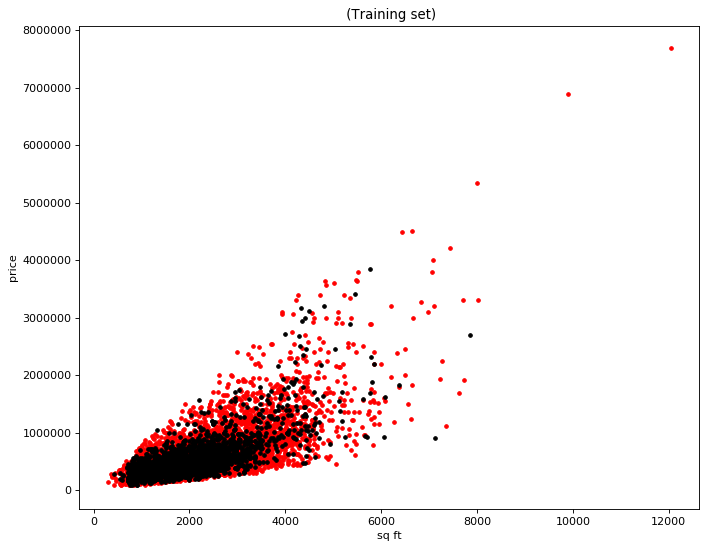

In [65]:
plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(X_train, y_train, s=10,color = "red")
plt.scatter(X_test, y_test, s=10,color = "black")
plt.title(" (Training set)")
plt.xlabel("sq ft")
plt.ylabel("price")
plt.show()

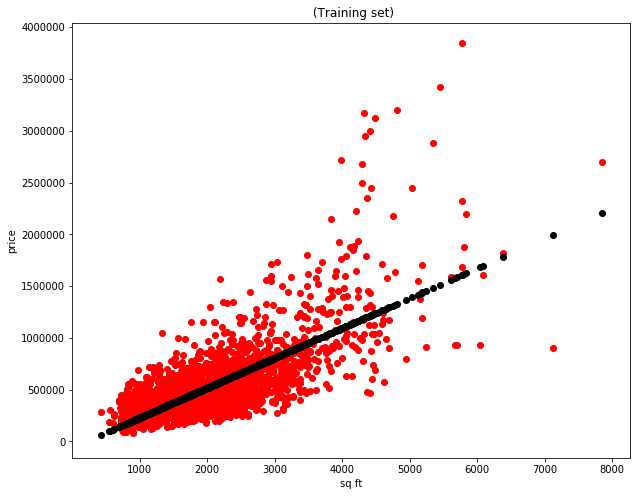

In [66]:
plt.figure(figsize=(10, 8))
plt.scatter(X_test, y_test, color = "red")
plt.scatter(X_test, y_pred, color = "black")
plt.title(" (Training sdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAn0AAAHwCAYAAADTtdlWAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAgAElEQVR4nOzdf5RkZ33f+c+3errF1AwwUmnw6gddjYPiILI2QW1Qwm58wggQsh3YXceGU4I5iGxDD2THsZNYuOODf3XWzm6Mxdoj0QbJYqpiWcbZINsiMhI4OcvaQMvmlwSsBugeZDBoRuKH1DKSpp/9496rvl19f9etqlt1369z7unuW1X33qqumfr08zzf5zHnnAAAADDdGuO+AAAAAAwfoQ8AAKAGCH0AAAA1QOgDAACoAUIfAABADRD6AAAAaoDQB6AWzOz3zOy1Qzr2L5jZTWXfd1zM7GfM7FfHfR0AymXM0wdg2pnZD0q6TdILJb1D0s/7N+2TNCvpcf/nTefcC0d/heNjZldJeq9zbiG0rynpAUk/6Jw7O65rA1AuWvoA1MFbJPWc59855w465w5KequkPw9+jgp8ZrZv5Fc7Zs65LUl/KukN474WAOUh9AGog1dL+q9Z7mhm+8zMmdkxMzsl6Qv+/t8yswfN7Dtm9kkz+0ehx/yqmf2u//3z/ce/0b//Q2Z2fcH7Ns2sa2bfMrP7zex6M9uIue6Gmb3bzL5pZt82s8+Y2eX+bc8ws98ws6+a2TfM7IS/79mS/kjSvJk96m/P8Q/5Z5J+NNvLC2ASEPoATDUzOyDpeZK+mPOh/1TSD0v67/2fPy7pByVdIOkDkv7AzM5LePw/kvR8Sa+S9EtmdlmB+/6ypIslLfi3XZtwjFdLulLSZZLOl/Q6SQ/7t/2f8l6DH/RvX5C04pz7tqQfl3Q61Nr5Tf8xn5f0QwnnAzBhCH0Apt0h/+t3cz7u3znnHnHOPS5JzrmTzrmHnXNPSfr3kp4lL6jF+UXn3N865/5S0n1KDlBx9/1JSavOuW85574q6bcSjvGkf01/z7/e+51zf2NmDUn/XNJP+8/nO5L+d3mhMMl3tfPaAZgChD4A0+5b/tdn5nzcV8M/mNm/MbMvmNm3JT0i6YCkC+Me7Jz7m9CPW5IOFrjvRX3Xseua+o7xp5JuknSjpG+Y2U1m9kxJ/52k8yR92u8m/pakP5b0nLhj+Z6pndcOwBQg9AGYas65xyR9SdLfzfvQ4Bsz+yeSfkbS/yKv9et8SY9KspIuM87fSLo09PNzk+7snPtN59yLJf19SZfLu+ZvSHpC0g845w7527Odc88OHhZzuBdI+vRAVw+gUgh9AOrgTkk/MsDjnynpKUln5E3x8ovyWvqG7XZJP29mh8zsUklvi7ujmb3E3/ZJekxe0DvnnDsn6b2SftPMDpvnUjN7pf/Qb0i60G8VDPsRSR8q/RkBGBtCH4A6WJPUMbOiLXN3Srpb3tx1G5K+I+nr5VxaonfKC2Ub8qZQuV3S92Lue0jS++R1yW7Iu753+bf9rKRNSZ+Q9G3/WJdJknPuc5L+UNKG3/37HDPbL+lqSe8v/RkBGBsmZwZQC2b2HyXd7pz7z+O+lqLM7F9Ieq1z7siQz/MvJR12zv186p0BTAxCHwBUlJldIqkt6S8k/YCkP5H0G865pCpeAIhUu5nmAWCCnCfpd+TNq/eIpN+T9J5xXhCAyUVLHwAAQA1QyAEAAFADhD4AAIAaGPqYPjObkbQu6a+dcz9mZs+TdJu89Sv/UtIbnHNP+GtYvl/SFZLOSvop59yGf4x3SHqzpHOS/jfn3F3+/qsl3SBpRtJ7nXO/5u/PfY44F154oVtYWCjp1QAAABiee++994xz7nDUbaMo5Dgub+HuZ/k//7qkdznnbjOzm+SFuRv9r484555vZq/z7/dTZna5vDUiXyhv4fG7zSyYWf+3Jb1C0oOSPmlmdzjn7s97jqSLX1hY0Pr6ejmvBAAAwBCZ2WbcbUPt3vVnkP9RebPBy58Y9eWSPuDf5VZJr/W/f43/s/zbj/j3f42k25xz33POfUXSKUkv8bdTzrkvO+eekNey95qC5wAAAJhqwx7T95uS/o2kbf/nlqRvOeee8n9+UNIl/veXyF9M3L/92/79n97f95i4/UXOAQAAMNWGFvrM7MckfdM5d294d8RdXcptZe1PO//TzGzJzNbNbP2hhx6KeAgAAMBkGWZL38sk/VMz25DX9fpyeS1/h/wFwSXpUklf879/UNJzJcm//dmSHg7v73tM3P4zBc6xi3NuzTm36JxbPHw4ciwkAADARBla6HPOvcM5d6lzbkFeIcZHnHMdSR+V9BP+3Y5K+qD//R3+z/Jv/4jzZo6+Q9LrzOw8vyr3MnmLhn9S0mVm9jwzm/PPcYf/mLznAAAAmGrjWIbt5yTdZma/KumvJL3P3/8+SSfN7JS81rfXSZJz7j4zu13S/ZKekvQ259w5STKzt0u6S96ULTc75+4rcg4AAIBpxzJsKRYXFx1TtgAAgElgZvc65xajbmNFDgAAgBog9AEAANQAoQ8AAKAGCH0AAAA1QOgDAACoAUIfAABADRD6AAAAaoDQBwAAUAOEPgAAsuj1pIUFqdHwvvZ6474iIJdxLMMGAMBk6fWkpSVpa8v7eXPT+1mSOp3xXReQAy19AACkWVnZCXyBrS1vPzAhCH0AAKQ5fTrffqCCCH0AAKSZn8+3H6ggQh8AAGlWV6Vmc/e+ZtPbD0wIQh8AAGk6HWltTWq3JTPv69oaRRyYKFTvAgCQRadDyMNEo6UPAACgBgh9AAAANUDoAwAAqAFCHwAAQA0Q+gAAAGqA0AcAAFADhD4AAIAaIPQBAADUAKEPAACgBgh9AAAANUDoAwAAqAFCHwAAQA0Q+gAAAGqA0AcAAFADhD4AAIAaIPQBAADUAKEPAACgBgh9AAAANUDoAwAAqAFCHwAAQA0Q+gAAAGqA0AcAAFADhD4AAIAaIPQBAADUAKEPAACgBgh9AAAANUDoAwAAqIGhhT4ze4aZfcLMPm1m95nZL/n7f9fMvmJmn/K3F/n7zczebWanzOwzZvbi0LGOmtkD/nY0tP8KM/us/5h3m5n5+y8wsw/79/+wmZ2fdg4AAIBpNsyWvu9Jerlz7ockvUjS1WZ2pX/bv3bOvcjfPuXve7Wky/xtSdKNkhfgJL1T0kslvUTSO4MQ599nKfS4q/3910u6xzl3maR7/J9jzwEAADDthhb6nOdR/8dZf3MJD3mNpPf7j/sLSYfM7CJJr5L0Yefcw865RyR9WF6AvEjSs5xzf+6cc5LeL+m1oWPd6n9/a9/+qHMAAABMtaGO6TOzGTP7lKRvygtuH/dvWvW7V99lZuf5+y6R9NXQwx/09yXtfzBivyR9n3Pu65Lkf31OyjkAAACm2lBDn3PunHPuRZIulfQSM/v7kt4h6e9J+mFJF0j6Of/uFnWIAvuTZHqMmS2Z2bqZrT/00EMphwQAAKi+kVTvOue+JenPJF3tnPu63736PUm3yBunJ3mtbs8NPexSSV9L2X9pxH5J+kbQbet//WbKOfqvd805t+icWzx8+HDOZwsAAFA9w6zePWxmh/zv90u6StIXQmHM5I21+5z/kDskvdGvsL1S0rf9rtm7JL3SzM73CzheKeku/7bvmtmV/rHeKOmDoWMFVb5H+/ZHnQMAAGCq7RvisS+SdKuZzcgLl7c75/7YzD5iZofldbV+StJb/fvfKekaSackbUl6kyQ55x42s1+R9En/fr/snHvY/35Z0u9K2i/pQ/4mSb8m6XYze7Ok05L+WdI5AAAApp15ha+Is7i46NbX18d9GQAAAKnM7F7n3GLUbazIAQCYLr2etLAgNRre115v3FcEVMIwu3cBABitXk9aWpK2tryfNze9nyWp0xnfdQEVQEsfAGB6rKzsBL7A1pa3H6g5Qh8AYHqcPp1vP1AjhD4AwPSYn8+3H6gRQh8AYHqsrkrN5u59zaa3H6g5Qh8AYHp0OtLamtRuS2be17U1ijgAUb0LAJg2nQ4hD4hASx8AAEANEPoAAABqgNAHAABQA4Q+AACAGiD0AQAA1AChDwAAoAYIfQAAADVA6AMAAKgBQh8AAEANEPoAAABqgNAHAABQA4Q+AACAGiD0AQAA1AChDwAAoAYIfQAAADVA6AMApOv1pIUFqdHwvvZ6474iADntG/cFAAAqrteTlpakrS3v581N72dJ6nTGd10AcqGlDwCQbGVlJ/AFtra8/QAmBqEPAKpu3F2rp0/n2w+gkgh9AFBlQdfq5qbk3E7X6iiD3/x8vv0AKonQBwBVVoWu1dVVqdncva/Z9PYDmBiEPgCosip0rXY60tqa1G5LZt7XtTWKOIAJQ/UuAFTZ/LzXpRu1f5Q6HUIeMOFo6QOAKsvbtTruog8AlUXoA4Aqy9O1WoWiDwCVZc65cV9DpS0uLrr19fVxXwYApFtYiO4KbreljY1RXw2AMTCze51zi1G30dIHANOiCkUfACqL0AcA04L59AAkIPQBwLRgPj0ACQh9ADAtmE8PQALm6QOAacJ8egBi0NIHAABQA4Q+AACAGiD0AQAA1AChDwAAoAaGFvrM7Blm9gkz+7SZ3Wdmv+Tvf56ZfdzMHjCz3zezOX//ef7Pp/zbF0LHeoe//4tm9qrQ/qv9fafM7PrQ/tznAAAAmGbDbOn7nqSXO+d+SNKLJF1tZldK+nVJ73LOXSbpEUlv9u//ZkmPOOeeL+ld/v1kZpdLep2kF0q6WtIJM5sxsxlJvy3p1ZIul/R6/77Kew4AmEi9nrf0WqPhfWWNXQAJhhb6nOdR/8dZf3OSXi7pA/7+WyW91v/+Nf7P8m8/Ymbm77/NOfc959xXJJ2S9BJ/O+Wc+7Jz7glJt0l6jf+YvOcAgMnS60lLS95au855X5eWCH4AYg11TJ/fIvcpSd+U9GFJX5L0LefcU/5dHpR0if/9JZK+Kkn+7d+W1Arv73tM3P5WgXMAwGRZWZG2tnbv29ry9gNAhKGGPufcOefciyRdKq9l7gVRd/O/RrW4uRL3J51jFzNbMrN1M1t/6KGHIh4CAGN2+nS+/QBqbyTVu865b0n6M0lXSjpkZsFKIJdK+pr//YOSnitJ/u3PlvRweH/fY+L2nylwjv7rXXPOLTrnFg8fPlzsSQPAMM3P59sPoPaGWb172MwO+d/vl3SVpM9L+qikn/DvdlTSB/3v7/B/ln/7R5xzzt//Or/y9nmSLpP0CUmflHSZX6k7J6/Y4w7/MXnPAQDV1l+0cc01UrO5+z7NprS6Oo6rAzABhtnSd5Gkj5rZZ+QFtA875/5Y0s9J+hkzOyVvPN37/Pu/T1LL3/8zkq6XJOfcfZJul3S/pP8i6W1+t/FTkt4u6S55YfJ2/77Kew4AqLSooo1bb5WOHpXabcnM+7q2xrq7AGIZDV3JFhcX3fr6+rgvA0CdLSx4Qa9fuy1tbIz6agBUmJnd65xbjLqNFTkAoOoo2gBQAkIfAFQdRRsASkDoA4CqW12laAPAwAh9AFB1nY5XpEHRBoABEPoAYBJ0Ol7Rxva297XugY91h4Hc9qXfBQCACgmmsAmWoQvWHZYIw0ACWvoAAJOFdYeBQgh9AIDJwhQ2QCGEPgDAZGEKG6AQQh8AYLIwhQ1QCKEPADBZmMIGKITqXQDA5Ol0CHlATrT0AQAA1AChDwAAoAYIfQAAADVA6AMAAKgBQh8AAEANEPoAAABqgNAHAABQA4Q+AACAGiD0AQAA1AChDwDK0OtJCwtSo+F97fXGfUUAsAvLsAHAoHo9aWlJ2tryft7c9H6WWCoMQGXQ0gcAg1pZ2Ql8ga0tbz+Aeqpg6z8tfQAwqNOn8+0HMN0q2vpPSx8ADGp+Pt/+rCrYUgAgg4q2/hP6AGBQq6tSs7l7X7Pp7S8qaCnY3JSc22kpIPgB1VfR1n9CHwAMqtOR1takdlsy876urQ3WjVPRlgIAGQyr9X9AhD4AKEOnI21sSNvb3tdBx+1UtKUAQAbDaP0vAaEPAKqooi0FADIYRut/CQh9AFBFFW0pAJBR2a3/JSD0AUAVVbSlAMDkYp4+AKiqToeQB6A0tPQBAADUAKEPAACgBgh9AAAANUDoAwAAqAFCHwAAQA0Q+gAAAGqA0AcAAFADhD4AAIAaIPQBAADUAKEPAACgBoYW+szsuWb2UTP7vJndZ2bH/f2/aGZ/bWaf8rdrQo95h5mdMrMvmtmrQvuv9vedMrPrQ/ufZ2YfN7MHzOz3zWzO33+e//Mp//aFtHMAAABMs2G29D0l6Wedcy+QdKWkt5nZ5f5t73LOvcjf7pQk/7bXSXqhpKslnTCzGTObkfTbkl4t6XJJrw8d59f9Y10m6RFJb/b3v1nSI86550t6l3+/2HMM7yUAgAH0etLCgtRoeF97vXFfEYAJNrTQ55z7unPuL/3vvyvp85IuSXjIayTd5pz7nnPuK5JOSXqJv51yzn3ZOfeEpNskvcbMTNLLJX3Af/ytkl4bOtat/vcfkHTEv3/cOQCgWno9aWlJ2tyUnPO+Li0R/AAUNpIxfX736j+Q9HF/19vN7DNmdrOZne/vu0TSV0MPe9DfF7e/Jelbzrmn+vbvOpZ/+7f9+8cdCwCqZWVF2travW9ry9sPAAUMPfSZ2UFJfyjpp51z35F0o6S/I+lFkr4u6T8Ed414uCuwv8ix+q95yczWzWz9oYceingIAAzZ6dP59gNAiqGGPjOblRf4es65/yRJzrlvOOfOOee2Jf2OdrpXH5T03NDDL5X0tYT9ZyQdMrN9fft3Hcu//dmSHk441i7OuTXn3KJzbvHw4cNFnjoADGZ+Pt9+AEgxzOpdk/Q+SZ93zv1GaP9Fobv9T5I+539/h6TX+ZW3z5N0maRPSPqkpMv8St05eYUYdzjnnKSPSvoJ//FHJX0wdKyj/vc/Iekj/v3jzgEA1bK6KjWbu/c1m97+sEko9piEawRqYF/6XQp7maQ3SPqsmX3K3/fz8qpvXySvW3VD0lskyTl3n5ndLul+eZW/b3POnZMkM3u7pLskzUi62Tl3n3+8n5N0m5n9qqS/khcy5X89aWan5LXwvS7tHABQKZ2O93VlxevSnZ/3Al+wX9op9gjG/gXFHuHHj9skXCNQE+Y1gCHO4uKiW19fH/dlAMBeCwteiOrXbksbG6O+mmiTcI3AFDGze51zi1G3sSIHAEyqSSj2mIRrBGqC0AcAk2oSij0m4RqBmiD0AcCkylrsMU6TcI1ATRD6AGBSdTrS2po3Ps7M+7q2Vq0CiUm4RqAmKORIQSEHAACYFBRyAAAA1ByhDwAAoAYIfQAwSVjdAkBBw1yRAwBQJla3ADAAWvoAYFKsrOwEvsDWlrcfAFIQ+gBgUrC6xXjRtY4JR+gDgEnB6hbjE3Stb25Kzu10rRP8MEEIfQAwKVjdYnzoWscUIPQBwKRgdYvxoWsdU4DqXQCYJJ0OIW8c5ue9Lt2o/cCEoKUPAIA0dK1jChD6AABIQ9c6pgDduwAAZEHXOiYcLX0AAAA1QOgDAACoAUIfAIwbKz0AGAHG9AHAOAUrPQQT/wYrPUiMHwNQKlr6AGCcWOkBmEq9Xk8LCwtqNBpaWFhQrwIt+IQ+ABgnVnqYXHTLI0av19PS0pI2NzflnNPm5qaWlpbGHvwIfQAwTnErOrDSQ7UF3fKbm5JzO93yBD9IWllZ0VZfC/7W1pZWxtyCT+gDgHGq6koPtGIlo1seCU7HtNTH7R8VQh8AjFMVV3qgFSsd3fJIMB/TUh+3f1QIfQAwbp2OtLEhbW97X8ddtUsrVjq65ZFgdXVVzb4W/GazqdUxt+AT+gAgSR27OWnFSlfVbnlUQqfT0dramtrttsxM7XZba2tr6oz5Dzpzzo31AqpucXHRra+vj/syAIxD/xx6kvfBPu7u12FbWPC6dPu1215LJDy9ntf6efq018K3ujrd7wtMBDO71zm3GHkboS8ZoQ+osbqGn7qGXWAKJIU+uncBIE5duzmrWFwCYGAswwYAcebno1v66jBYv9Mh5AFThpY+AIjDYH0AU4TQBwBx6OYEMEXo3gWAJHRzApgStPQBAADUAKEPAACgBgh9AAAANUDoAwAAqAFCHwAAQA0Q+gAAAGogc+gzs7aZXeV/v9/Mnjm8ywIAAECZMoU+M/tfJX1A0nv8XZdK+s8pj3mumX3UzD5vZveZ2XF//wVm9mEze8D/er6/38zs3WZ2ysw+Y2YvDh3rqH//B8zsaGj/FWb2Wf8x7zYzK3oOAACAaZa1pe9tkl4m6TuS5Jx7QNJzUh7zlKSfdc69QNKVkt5mZpdLul7SPc65yyTd4/8sSa+WdJm/LUm6UfICnKR3SnqppJdIemcQ4vz7LIUed7W/P9c5AABAdfR6PS0sLKjRaGhhYUG9Xm/clzQVsoa+7znnngh+MLN9klzSA5xzX3fO/aX//XclfV7SJZJeI+lW/263Snqt//1rJL3fef5C0iEzu0jSqyR92Dn3sHPuEUkflnS1f9uznHN/7pxzkt7fd6w85wAAABXQ6/W0tLSkzc1NOee0ubmppaUlgl8Jsoa+/2pmPy9pv5m9QtIfSPqjrCcxswVJ/0DSxyV9n3Pu65IXDLXTYniJpK+GHvagvy9p/4MR+1XgHP3Xu2Rm62a2/tBDD2V9mgAAYEArKyva2tratW9ra0srKytjuqLpkTX0XS/pIUmflfQWSXdK+rdZHmhmByX9oaSfds59J+muEftcgf2Jl5PlMc65NefconNu8fDhwymHBAAAZTl9+nSu/cgua+jbL+lm59w/c879hKSb/X2JzGxWXuDrOef+k7/7G0GXqv/1m/7+ByU9N/TwSyV9LWX/pRH7i5wDAABUwPz8fK79yC5r6LtHu0Pefkl3Jz3Ar6R9n6TPO+d+I3TTHZKCCtyjkj4Y2v9Gv8L2Sknf9rtm75L0SjM73y/geKWku/zbvmtmV/rnemPfsfKcAwAAVMDq6qqazeaufc1mU6urq2O6oumRNfQ9wzn3aPCD/30z4f6SV+37BkkvN7NP+ds1kn5N0ivM7AFJr/B/lrwu4y9LOiXpdyQd88/1sKRfkfRJf/tlf58kLUt6r/+YL0n6kL8/1zkAoBJ6PWlhQWo0vK8MXEcNdTodra2tqd1uy8zUbre1tramTqcz7kubeOYVvqbcyexjkv5FUI1rZldI+i3n3D8c8vWN3eLioltfXx/3ZQCoql5PWlmRTp+W5uel1VWpyIdTryctLUnhAezNprS2Vux4AGrJzO51zi1G3pYx9P2wpNu0M/7tIkk/5Zy7t7SrrChCH4BYZQa1hQVpc3Pv/nZb2tgY5CoB1MjAoc8/yKykH5BXAfsF59yT5V1idRH6AMQqM6g1GlLU/8dm0vZ2kasDUENJoW9fygNf7pz7iJn9z303XWZmClXkAkD9xE0hUWRqifn56ABJxSKAkqQVcvyI//XHI7YfG+J1AUD1xQWyrEEtXLjx6KPS3Nzu25tNb4wgAJQgMfQ5595pZg1JH3LOvalvu25E1wgA1bS66gWzsKSgFg55F14oXXed17rnnHT2rPe11fK6dNttijiqiiprTKjE7l1Jcs5tm9nbJd0+gusBgMkRBLIs1bv9RR9nz+69z5NPSgcPSmfODO+aMZj+3+PmpvezREBH5WWt3v0FSY9L+n1JjwX7Q/PlTS0KOQCUIq7oox+FG9VGlTUqrnAhR8h18tao7Z/M+PsHuTAAqI2sxR0UblRbmcU7wIhlXZHjckm/LenTkj4l6f+S9MJhXRQATJ0sYW52lsKNqhu0eAcYo6yh71ZJL5D0bnmB7wX+PgBAFlFFH/2e9SzGhVVd3uIdoEKyhr4fcM79c+fcR/1tSd5EzQCALDodrxq33Y6/z8NTP0x68oV/j1WssqayGAmyhr6/MrMrgx/M7KWSPjacSwKAKdXpeIP944IfXYSTIfg9bm97X6sU+JaWdqYBCiqLCX7wZQ19L5X0/5rZhpltSPpzST9iZp81s88M7eoAIM0ktmzQRYhhWFnZvQ605P28sjKe60HlZA19V0t6nrwVOn7E//4aeaty/PhwLg0AUlS9ZSMukBbtIpzEgIvRobIYKTLN01dnzNMHVFiV50zrn8RX8lrzio7/Kvt4mD4LC+ptbmpF0mlJ85JWJXWq8O8BI5M0T1/Wlj4AqJ4qt2yU3dVG1x1S9K65RkuSNuVNrLspacnfD0iEPgCTrEpzpvV3vcatvlE0kFY54KISVu68U31/FmjL3w9IhD4Ak6wqBRFRYwvNou9bNJBWKeCikk7H/AEQtx/1Q+gDMLmqMmdaVNerc3uD3yCBtCoBF5U1H/MHQNx+1A+hD0A5xlVZOsicaWVdc1xLinPlBdKqBFxU1urqqpp9fxg0m02t8ocBfFTvpqB6F8hgEitLy7zmKlcRo1Z6vZ5WVlZ0+vRpzc/Pa3V1VZ2q/hvEUFC9C6A8Ua1jk1hZWuY1T0rXK/P8Tb1Op6ONjQ1tb29rY2ODwIddCH0AsoubDLnsStVRKLMadhK6Xqs+kbVEKAWGjNAHILu41rGZmej7V3kAednVsFVdjzVQ9dbYSQilQ9Dr9bSwsKBGo6GFhQX1pvz5YrwIfQCyi2sFO3duMro3wyalS7YsVZ/nr+qhVCqtJTIIemamN7zhDdrc3JRzTpubm1paWiL4YWgIfQCyi2sFC7ozq9y92W8SumTLVPV5/qoeSktqiez1elpaWtKmPySiv5hya2tLK1UKupgqVO+moHoXCJnEKl14qv67q3oFdEnXt7Cw8HTgi2Nm2t7eznd9gI/qXQDlmPTWsToXClT9d1f17vaSWiKzrI7BZMoYFkIfgHyqXrAQp8xCgbLD46jCaJV/d1UPpSV1j6cFOiZTxjAR+gDUQ1mFAmVXmVa9anWUraNVDqUltURGrZph/nJ97XZba2trzK2HoSH0AaiHsgoFyq4yrXLVatUD6ShFtET2jh7VwspKrulWOp2O1tbW1G63ZWZqt9s6efKknHNMpoyho5AjBYUcwAQIVgU5fdrrbltd3dtKVFahQKPhBaB+Zl4LVV5lH69MVS+uGJNer6fjx4/r7Nmzu/Y3m01a6sGenzoAACAASURBVDB2FHIAmF5ZW6PKKhQoe+qTKk+lUvVpVEbsqquukpnp2muv3RP4pILTrdS5uAgjR+gDkE/VPqSydo+WVShwzTXe48OiwmPW16nKVatVDqQjdtVVV+mee+5JvV+W6tyn0X2OUXPOsSVsV1xxhQPg63adazad8z6ivK3Z9PYPcsx22zkz72veY5ntvp5gMyt+TUnX2v/8zZxbXk6/X9LrNOhrMCzD+H1XTcxr3+12Xbvddmbm2u22k5Rpa7fb2c/dbke/d/McA+gjad3FZJqxh6qqb4Q+IKTsD6kyQkWWayorVGV9/pP0YZ722lQ1kJYh4v3XnZ11rQMHMoe88NZsNl03z+szyj9YUBuEPkIfxm1aPjjL/pAqIxylBccyW6uyPv9J+TCvQ0tekr73X1dyzQJhT5JrtVr5Al/E+Sv9xwEmRlLoY0wfMGyTPG6nf1zaBRdE36/oGK8yCgXSxuqVOSVK1jFukzIWrsrTxYzC6dPqSVqQN8D9qKStxAfsdd5556nb7erMmTP5q3arPJ4T0ykuDbLR0oeSTOpf81GtQHNzzjUau/fNzg6/u3QQZba6ZW0Zm5QWtHG3SI65BbzbauVq2Zubm9v185EjR0q4iCnpBUBliJY+YIwmddqLqFagJ57YO3dcfyVrHqNo6Siz1S1rBXDVlxQLjLNFsgIt4CvK3rLXbDZ188037/oAvfvuuwe/iCqvQoKpw+TMKZicGQOb1Alu4yYNjjLIc8kysfIggnARDrDNZjVD2KiN87WpwL+LRqOhLJ+BrVZLN9xwA5MuYyIwOTMwTpM6bidPa88grZbDbukIt7pJ0szMzri1SRhXOUzjbJGsQAv4fMx7fGZm5ukl0gqP1wMqaGihz8xuNrNvmtnnQvt+0cz+2sw+5W/XhG57h5mdMrMvmtmrQvuv9vedMrPrQ/ufZ2YfN7MHzOz3zWzO33+e//Mp//aFtHMAQzUpXX39osJqXFdu1QoU+nU6O8/n3Dlv3yQV1AzTuLoXh9i13Ov1tLCwkLom7urqqpp97/Fms6lbb71V29vbrIWL6RM32G/QTdI/lvRiSZ8L7ftFSf8q4r6XS/q0pPMkPU/SlyTN+NuXJH2/pDn/Ppf7j7ld0uv872+StOx/f0zSTf73r5P0+0nnSHseFHKg1voHmS8vV2/S4aznmNSCmmk1pGKXbrfrms3mroKLpPnz+idhzj3tClAxGtc8ffIq4bOEvndIekfo57sk/UN/u6v/fpJM0hlJ+/z9T98veKz//T7/fhZ3jrTnQOgD+mQNWaOoYM1zjnFXqmKvIfxRELd6Rq6VMoAJlhT6xjGm7+1m9hm/+/d8f98lkr4aus+D/r64/S1J33LOPdW3f9ex/Nu/7d8/7lgA8sjaHTiKOeDynGOUlapVW5+4qgboWo7rwo1b+zbXmrjAlBp16LtR0t+R9CJJX5f0H/z9UQOFXIH9RY61h5ktmdm6ma0/9NBDUXcBkGYUA/XznGNUBTUVmIpk2vV6PS0tLWlzc1POOW1ubmppaUm9Xi+2OCNuP1AnIw19zrlvOOfOOee2Jf2OpJf4Nz0o6bmhu14q6WsJ+89IOmRm+/r27zqWf/uzJT2ccKyo61xzzi065xYPHz5c5KkCGEXLWp5zFC2oydtqN0gLJy2EmaysrGir7zXe2trSyspKbHHGatWr5YFRiOv3LWPT3jF9F4W+/5eSbvO/f6F2F1l8WV4Rxz7/++dpp5Djhf5j/kC7CzmO+d+/TbsLOW5POkfac2BMH1BQ1cb0DeP4UWPSio4dzPNcarKKQ1yRhZlFjtsz/zWmOAN1pnEUckj6PXlduE/Ka2V7s6STkj4r6TOS7ugLgSvyKmq/KOnVof3XSPr//NtWQvu/X9InJJ3yA+B5/v5n+D+f8m///rRzJG2EPky0cYeDuPOXeV3DfI5JFb9xIa3Vin9M0XP1P99JWOKtgHBYa7VabnZ2NrIKl2ININ5YQt+0bIQ+TKyqhoMi1zWu8JrUahcX0lqtYq971hbCuPPOzIz/dzuAbre7Z23buGCXd1oWoE4IfYQ+1FFV56XLe13jDK9J15oU0oqE1KyvS9x5qxLqC+h2u67RaKQGPrpwgXRJoY+1d1Ow9i4mVtzauWbeFBnjkve6xrlGa9LatCsr5V5X1nVw416PQc8/Br1eT8ePH9fZs2czP6bdbmtjQp4fMA6svQvU0Sjnpcsj73XlmZal7OrXoOK31drZt3+/9zXrFDBZrylrdXHUecMmZD66YNqVPIGPKlxgMIQ+YFqNal66vPJeV9aQOMz58R5/fOf7s2e940rRIU3aCXkXXihdd1251xSEw5mZ6NvHHeojRE2kHDXtShQzk5mp3W5rbW2NtXCBQcT1+7Ixpg9TYNzVu3HyXFfWMX3DGsOY57hR1zrIY9PWNa5ioU6fuKKL8M9x2+zsLGP1gJzEmL7iGNMHVECv542hO33aa8laXd3b7VnmGMbw+eL+j4w6btp4uyKPTRqjl+V1GbOFhQVtRjyvmZkZnTt3LvZxrVZLN9xwAy17QE6M6QMw2bKs0VrWGMb+buI4UcfNOp4uz2OTjjnA2rXDENWNG7fm7blz5/asnCF5C6V3Z2d1hsAHlI7QB2A6lDWGMWoZtX5xx80SMPM+toJj9KLErYd7wQUXRN4/GKPXnpmRSWpL6spbY7Pz5JPZlq0DkAuhDxi1rNWcrMOaT9G1dfsltaylHTcqeM7OetW/RR5bhcKbjOLWw5UUuxZup9PRxva2tiVtSNr1qkxIFTIwUeIG+7FRyIEhiBp8PzvrreIQLmqYkEH6U2nQgpBBimeqWniTQdJ6uIkTKVd1EnFgQokVOQh9qIi4D7j+cFd0/dayVTWEDPO6CNyR0lbAKLweLq83UCpCH6EPVZG0hFaWrX8d1mFK+zAeVyCMmxal0XBuebm8c1Qx7PYbwXV2u13XarX2hLn+tW4HWg93Ul5vYAIQ+gh9qIosLX1553cb9bUGH8pVWw832MoKflU35N9BXNhLasVjPVxg/JJCH4UcwCDyFlukLaEVaLXGP6g/aQqRqArXra3RVFymDfAPVsWogv73x7Fj5RXnxP0Ojh4tdNxjx45p3759MjPNzMzo6NGjqUuk9U/H0ul0tLGxoe3tbW1sbDDlClA1cWmQjZY+pCja0hLuymq1nJubiz7GuLu8klr64rqpR9H9nKW1NKtRjw2MGr9ZtNCjpON2u1134MCBxBa9uC11vB6AkRPdu4Q+DEFZVYfjCHdZzpkUasdZcZklTMU9r/7APTs7WAhLkrUrP09VcJYl3nIcd3l5ObbqNm3LPF4PwEgR+gh9GIZxtnYNIk8LZVw4TDpG/2OWl8sPtd2ucwcOpAef/sKTouviFpG1aCfr+yXveNCI4w4S8sJbq9Ui8AEVlRT6WHs3BWvvIlaRtVKroKzrjlr3VfKWMEta0aLZLDZpcpRjx7xjJazh+vTzGmRd3CKyni/r6x63tnDG4x47dkw33nhj9sdHYD1coPpYexcYhkldQaHIGq9RotZ9zbKEWZkFHydOSE895YUhs+j7BM8r6/MLLxvW60kXXugd28z7vr9IIq6YJ0vRTp73S9xybClFP8F6uEUC34EDB2Rmarfb6na7OnPmDIEPmGRxTYBsdO8ig3EXWxQxzPF4ZXdpBrK8zmnPK2v36NzcTjf1vn17b5+dzdbNHXXdg3R1Z+xSXz5wwM00GgN13zYaDbdcl6lvgCkjxvQR+oCnDXN+t7KLF/Jcb5YAlrUQYmYm2/WPuqAlIfx2u103MzMzUNgzM8IeMOGSQh/du0DddDreOLhWa2ff/v3lHLvsLk0p+5yAwfNqt72u2HZ799jBqNvjJI0RlNK7jPN2lWcV0aV+7NgxmZmuvfZanUu77gStVksnT57UiRMnSrtcANVC6APq6vHHd74/e9YrwBhksmApOlgtL8cHsSziAtTm5t5xdFHjDPuvL3x7UvBLEoyvixtnF7e/RL1eT2Y2cHHGAUldifF6QA0Q+oBJk6W4IE2W1rO8q40E+oPViRPJQSxOcH6XULHqnBf+rruuWGDNukJK1OPiHj/EYp5jx46p0Wg83bJXRFNeyAv6dB+V1CkafgFMlrh+XzbG9KGCut29K3gEY9BarewFAmlzDI5zbd2482cdK5j3GsPj5NLG8kl71/YdQTHP8vLyQGP1gq118KDrDnNC6kFNYmEUUDGikIPQhymRtVAi7YO8aKXrqJbdyjsRcVkhJipsBgF5DCHkyJEjpYS9dru9M5lyVYPVuP/QAKZEUuijexeYJFkLBNLmwkvrlhx1gULW88TNxRc2yDyAUWMST570IkierukB9Xo97d+/X/fcc89Ax1leXpZzThsbG+nj9Yp255cla8EOgOLi0iAbLX2ooDwtYP1z4eWZM66qLX3ttteNPehzL2spuJKPefGhQ6W07B05ciT+mqNa05aXx9/KNqnLGgIVI7p3CX0Iyfthnef+3e7uUNJqlfvBGTemLy2g5e06G3dXW9pExP3j0sp87oNeX55jtNuuK7kDJQQ9Se7yyy9PPmdcmI4byziqkJ90baO8BmAKEPoIfQgMM/zEBbLwCg5lPYeDB5NDT/815v1AHXZ4zSIpbAe3BS1BZT73LAY9ZrfrlgdcNSPYDhw4sDNeL03WFVOCbZStbOP+QwOYEoS+ATZC35TJ+2Gd5/5JXa9ltlaktXRFtUbm6TrL8uFbpWKAtGsZRrdhwWN2u13XbrcHDnr7pOxBLyyua7wKLX3OVet9BUwoQt8AG6FvyuT9sM5z/6RWlDJbTIqEyzLCa3DfSWuRqUhLX7fbdXNzcwMHvuVGY896u08HpLTW0biW6CqM6QNQCkLfABuhb8pMQ0tfkXCZJ6ilHXvSxl6NcUzfxRdfPHDIM8l1++dgjDr/3NzeFuDwNcX93lqtnedEKxsw8Qh9A2yEvikz7jF9ZXywFg2XWVqGlpfjQ2Vw7Emssgw/z1Yr30TWWY7Zd5yyJlO++NCh6HPnqeKe5N8bgNwIfYQ+hI2reresFqe4MX1zc/mrR+MmIo4KBmktRqNo6Rv0dzfEbsxut+tarVYpYW+5f9WPfnkKMia1hRZAIYQ+Qh+qoMwP3TKqa/OuehE+9zjGf5XRSpvWilnoskYY9gJFWvombSwmgEIIfYQ+VEHVutfytBb1h6JxjP9KCs1R1zPIRNZJ/GMvlxDyJLlGo5E97IWvIe+YvtC1M24PmF6EPkIfqqBq3Wtx15M27924gkNSSI1qwcoa+PL8DkqcX68dXg+3iLzVuwBqgdBH6EMVxHWvJS2HVrXrGWcXYd7VJOL2p4XaGN1u1x00Gzjs5W7VA4AcCH2EvuqqW8tEuNsxCCUFQ0ip15P19T9wIDpIjaqII2+L3oAhu6wqXEluOXidqrSyCYCpQ+gj9FVTXQeWRz3v/q3Vqt4H9fJy/PVmHRM3aADJM3YvbqxfptN0nZXQqndgbs51k8bZZb2+tPtF/TEx5GplANVE6CP0VVPVxriVJe0DOm/V7DA/qPOEorju0qy/s2GF/BKPe+TIkVJa9Q4ePOiN10sLpFmuO+1+SX9EDKFaGUC1EfoG2Ah9Q1S1atYyZPkgz7vo/bA+qPOGpaRryxKwhhnyS+jCvPzyywcOe3sqceNer+A6s7weafcr8kfEJP8bA5AoKfQ1NCRmdrOZfdPMPhfad4GZfdjMHvC/nu/vNzN7t5mdMrPPmNmLQ4856t//ATM7Gtp/hZl91n/Mu83Mip4DYzI/n2//JFhZkba2du/b2vL2B4o+v9Oni19XlCzXGjYzE72/0ZA6nfTzxV1/kefV60kLC965Fxa8fRsb0va29zXL9Ui66qqrZGYyM91///35r8O3vLws55zOnTunEydO7Fyj99/SXvPz2V+PtPsVef0m+d8YgMKGFvok/a6kq/v2XS/pHufcZZLu8X+WpFdLuszfliTdKHkBTtI7Jb1U0kskvTMIcf59lkKPu7rIOTBGq6tSs7l7X7Pp7c+q/8O/1yvzCvPL8kEe9byDcNBuS61W9DHK+qDu9aQLL5Q2N6Nvj3sOS0vR+9/ylmznLSvk93retWxueu1Wm5vez3G/+773SO/YMS0sLMjMdM899+Q7d8iRI0ee/uv56aAXtrLiXV8/M+89kPR6hK+5EfPfdPD4tNevP3jm/TcGYHrENQGWsUlakPS50M9flHSR//1Fkr7of/8eSa/vv5+k10t6T2j/e/x9F0n6Qmj/0/fLe46050D37pAN0i2XZaxTlSYQ7r/2MqZFKbIsWdT6wFm7W5eXd8b2zcx4P2eV5XlleT5xr3GrFXvOywfstu3fUqdd6XaTX+Ok1yOq+KJ/yzqmL8sUPFUrGAIwEI1rTF9E6PtW3+2P+F//WNL/ENp/j6RFSf9K0r8N7f8Ff9+ipLtD+/9HSX9c5Bxpz4HQV2FlDJIv26DnDQ/+D4/9i1pmrRuxBu/sbPK50sZ/xRUSpFWOhpeEC6671fK2rJMHZ33tksZE9t13+cCB0oLekSNH0n57O88jKViHQ3WRlUTyVO8mvRfqWj0PTLlJCH1/EhHIrpD0ryNC389K+uGI0PdHRc4Rc91LktYlrc/Pz5f6y0CJkgpBhl0ZnBZeirSepE3l0v+BHA5a4S2qxSuQVkRSpHI0reUwa6DI8jvrdjNVEXe7XXfeeeeVEvaWDxzI9vtLex5xr3Ge31GZoWxaq+eBmqtS6KN7F+VJ+tAaZmXwsFpIslRhhj+Qk+5X5BxRH/ZlV44mBYqksGPmhdmUgHlxCSFPkmtJrpv0e00K9nmDdZ7fUZ5QlvbHxzRWzwOoVOj7PyRd739/vaR/73//o5I+JMkkXSnpE/7+CyR9RdL5/vYVSRf4t33Sv6/5j72myDnSNkJfhSWFr2G2YhQ9dtEP4bgP5LRgEXW+pJa5RmPneQTXlhYM8k4/kxQoikw94m9ljdk7b98+1+3vko76PSaF/kFDW1qLb5ZQluUPE1r6gKk0ltAn6fckfV3Sk5IelPRmSS153aoP+F+DAGeSflvSlyR9VqGxdpKuk3TK394U2r8o6XP+Y35Lkvn7c58jaSP0VVxckBrmeKUiLSSDfAhHfSCnFQrMze0d7xecr38MXtSWFp5nZrKNP4t7XNbXKGE7UlLQO3ToUL7ff1pYSuvyzhra4rqxs4SyrF3ljOkDps7YWvqmYSP0TbAsY+uKjL8r0kJS9EO4P8hlbU2K28Lj/bIWDKRVhmYd05clWCQt9eZvyyWFPUnu4osvTv9998sS+rvdnZbTuNc1y3uzaCjL+ocJ1bt7FSmKKXoOXncMAaFvgI3QN8WKfqgWeVyeD+G4Fp4DB5LHK2bd0rpu+68trdUpqXo3KfhkeV1DW1dyNmDIm5Nct8gHbPhDOq2QJK21Oc96uEXDAV23xaT9kVNGOKOFFUNG6BtgI/RNsUE+GPN8GOftqhs01KVtWbtmBy0ayfJcwlPRRFxPWa16TxdmpHXBZx0qkLSlzRWZVkxDsNgx6haxsopoipyDQI6SEPoG2Ah9U2wU1YtFWg4GKGjIFUySJgHuv7a40Dozk/z8szyXRmPPGMOywt6htA/WcAjrfz+kjWtMCrRFq5TLDGd5A1PVuhzHEVyztn4P4xxUTe9WtffjBCH0DbAR+qZYWX9xJ/3nlFYIEXWMVmtvEcYwtv6Wp6TxS0nHSXttxlCcIcl14wpZ8lxb0e70QauUR93qU8WWwXG0iNHSVw1VfD9OEELfABuhb4qV8R9L2jGyDvrvP8bc3O7VLOKqbQftCk77KzpLd2Qgbom2lGMsa/CxepHFGWktBVnCV9JE38HzzPsBnjUIj7J1o4pBZBwtYozpq4Yqvh8nCKFvgI3QN+WSxnFl6VpI+88pLTCFg1LSf3BRHxRljv2LagXLOq2Lc/FVt+E1aiNei7ImU57tf92ydAllef2SijbCr0PeD/Cs093kOdYg3WBV7HIc1wc/1bvjV8X34wQh9A2wEfpqKCrAhKdLCUtbBzZvEUDUf3LBh0L/B0VZga//wzTLNfevBZwUjsJBusSgJ3ndwYnX2f97y1qFm+c1G+QDPGsXc57HF2k1qmLLCi1i9VXF9+MEIfQNsBH6KmpYfyn7wSQx6ITPm9QaFp66JK3VLG0LT6xcNLTMzKQvdeZcsRaoDPednZ0tLezNNhrZWzqDuQkHDeBpr8Eg77mk17zI+MAi41KrGLBoEaunqr4fJwShb4CN0FdBw/wPIS3wRI29y1J0UUZX7IEDxY+TZZmwtFAYFy5SJlSezRjk0raGvPF/Tso0ifOuLcvzzlpAM6wAUiTAldkNRsBClfB+LCwp9AVLlyHG4uKiW19fH/dlIGxhQdrc3Lu/3ZY2NqReT1pZkU6flubnpdVVqdPJdmyz/NfTaklnz+Z/3Ch1u95r0OtJx4+P5Hqbkh4v4TiXS7qvf+fMjHTppdHvgyjOSY2G97WfmbS9Hf++CgveY8PQ60lLS9LW1s6+ZlNaW4t//6b9WwBQO2Z2r3NuMeq2xqgvBhjY6dPx+4MPzs1N7wN+c9P7uddLP26vVyz0nT3rhZAyNJteiCxTu70T+JaW9ga+Is85xlXyFrk2lRP4jigi8EnSuXPSo49Ks7PpBwlez/n56NuD/XHvq0Cz6f0BMSydjhfw2m3vd9JuJwc+ybueZnO01wlgcsU1AbLRvVtZSd1gg4xxSpuao+xpU1otr8s2/HMZxR/hLUu3blpXZoZuzzLXw00tzoh7/VutveMcZ2eTV9bI+vpUuXuJbjAAIUro3qWlD5Pnmmv2tk4FrRtJrYBpku6ztCTdcMPeVhWz6C7DNK2W9Pjj0mOP7ex73G8bi2rxydr612rtPK7Vkvbvl97whmxdl/3abenkSengQenJJyNbMy+R16p3Y74jRwpS393hnVlaUIPX/+xZ6RnP8J538LrdcstOS1laS1pcq1m363WVZhki0Ot5r3Wj4X3N0sI8qE7Hu77t7ezXCaCWCH2YLMeOSTfdtDtomUlHj3ofdmldeEmS7nPrrd7X/tBQJPBJXkAJj92SvJ9XVrzvOx0vhMzP74TRubn04/7kT3of/CdPeiHy7Nmdbu683bjPf74XGIOweO6cJOl87XThfi3fESNdLC/sPW1mZuf1vfVWaXk5e/f5Y49J3/mO9/yDMW3hECbFB6Qi3athgwwtmBbjCL0AsotrAmSje7dyut34rtSkOebSKnuT1l+NOkdYli7Tubnd3bhpXZXBNfV3VWbpRg6e66BTxMzN7dlX6hJpWV6DIq91sAVd5YNMnJy3u7Tuc4sxzQZQCWLKFkLfRMuyekH/smZJH9pF17mNCiNZx99lnVMvy1x6g4S5AluZYe/yPK9B/+8u71jHuOAbd/y4c2QNLsNaRWBSxuzVPfQCFUHoG2Aj9I1ZnnVKg/unBb6iRRJxH17hc44iiI3gPGUGPUluudEodi3NpjcnXzikR7RCFt76A90wCoEGCT2T1HrG0llAJSSFPubpS8E8fWOWpQDBzBvDJaXPc1akoCF8nI99zPt67pw3zmxpSTpxYud+Bw/uLs6YMFdJuqekY81KeqLd9n7I8prPzDw9bnCkwnPapc3lF9Y/H+Q113hjEPPMs5dmkubhm6RrBaZY0jx9hL4UhL4xi/sQDjtyRDp1Kj5YZPlQ79dqeQEuPMHzxz4m3RhRpzoz4x2zPxRMkBdKur+kY+2XtJV6r5AgGF17bUlX4AsqpPsLZvqFA13W4BI3kfLRo9KddxabGDxKnhA6bkUmlwZQOiZnRrXkqfDLUnX73/5bcktSeCqWLMcz86Zn6a/yXFuLvv+5c9X7AM4oqMItK/A55Qx8QYVs2ZpN73cYrsaNqwAOvyeyTna8shJdfX3nneVOn5KnGn3clbODVj8DGL64fl82xvQNRd4xSmVMVBweU5X1eK3W7nGB3e5g11CxTSVumYoz+re5ud2v8aDVxlG/v6JFGuHCoaAAp3986KjGr+W55kkZ+wdgqEQhB6FvJPqLKMID8IMPzSKD3QedgqS/AjTr9CnhgJK1wrfi2yGNOexJ+SqmB9mSAl1aJWzR1TuGUama5ZqpnAXgSwp9jOlLwZi+jKLG8/RLWr0iyxilXq/YuK9Wa+96s9Os73U+pnJWzAgsSzqReq8YZl7XZJFimiKKFhGkje2r2vi1SRr7B2CoGNOH4Ysa49Qv6Q+M8BiluLFJnY73oZtXnQKf9PTrHIzXKyPwXa6dJr7CgU/yfqejCnzS7vGceca8pS3nV7Xxa4OsRAOgNgh9SJb1gzLL2raB/uXAzLzpLoLzJS1lFTXQPsvyZDUSLJNWhkPygt59eR7UakkHDkTfNuopWYLQk3eJtCwhqkpr3kb9u5CkRx9lKTQAO+L6fdkY05drcHieJbKittnZ7GP+osY4dbvOFZ0AeJjbiCZsLnOsniS3XPRaGo1sK6hk3Q4ciF/NJFhZI+52s533atyY0KQJt6MKfqIKRKoibuwrBR1ArYhCDkJfIXkGh5dRZRtUc8Z9gCfpdstdqWFCtv0qL+gdKuOaDh70fh9lhd0guCX98RF1u5lXSBTcnnT8pPfUpIUoCjqA2ksKfXTvIl7auKaw8BgnaW8XbhZnz8Z3q11wQXI388qK9MQT+c85oYLxeo+XcKygC/eRxBNm/H0++qj3tayxZM55v9ujR+PHz0WNrzt5cmellJWV+OMnXWen403Q3W9rK/mY45Tn3yyA2iH0IV7eweHBGCfnvA/dViv/OePGJp09mzweqyYfakHYK0NQnJEY9iTv93HBBfkOHozRzGpuLn5s5uamt7zZ6mr0+Ln+5dD6V8FIem/0T7rcb9JCFAUdABIQ+hAv6+oEUeJaSZK0WjutNmmBcWtLOn58p/WvMb1vZVN5YW9WO/25mYozgla1vBXQd96Z7/5PPukF+jhxrWtZCjTiAk/wDGBUpAAAGTBJREFUfksyaSFqkH+zAKbe9H5SYnCDTkuRtzXkhht2zpslMIZb/0ZdFVqk+zrvKVReq57kBb1dHeBpVc/hOe6yPt8grOf93TvnBb8kUceMWw4tHBDjglDwfksyaIiKq34f1pJpVZtKBkC1xA32Y6OQI5P+we7h6sa8FZxhI6p6LbSVVZkas6nEbXaQawmqoeOqY6PuHxTjZH1M3te9X9bCn6wrccS9x4s8Nq4AZXmZJdMADI1YkaM4VuRI0OtJ1123t4Bidla65Rbv+7RVOgL9KyfErYhQBUkriwxy2BKPdUgZxuqVod32WuCaTemxx4of58CB5MfHrXYR9z5ptbzW4rhxfqMQd20zM9Et00VXDwGAEFbkwHDEVcw++aQ33i7oepuZ8fa329KRI9FdhZub3of0hRd6XV6PPuqFx2EYdDLnEsdzXaJyu3EzVeKWxcwLU29962CBT0p+fLvtVe+urOztDo3qfp2dlb773ewTMQ9LXBd33FCEQYpDhtVdDGCq0NKXgpa+BHHrfUZpNr0P7ve+N33sVmBurprTsCwvSzcOtrhZ2SMCp/Jf8dycdPPN3vdJ69z2V+8++mh04cmoW9JG1dJXtXWAAYxVUksfoS9FbUJf2rQXUfJ2wTYatV/8fSK7cMcpmPcx6n0WF5Li/hgxG+37Ly6MHT3qTUFTVkiL+3dIdzFQS3TvIlnedUkDq6s7XbdZ1DTwlTnliiTt1wi7cMdtczP+D4u47tCqTLMSV0l74kS5FbZF5hKkOxiopX3jvgBUQNy0F0ePet8nfRjFdVWBLtwyJBXNxE0Yvboa3cI2jrnqOp3ofz9x+4uYn48OxnEht78FMvgjL7guAFOLlr66Cv7SN4tvSTl3TnrDG7z7XHjhTpFF0DJw/Hj2MXfN5kjmtquCYcyvV8vAJyWPGf3bv43eP8hcdZPYApZ3LsEscxsCmEqM6UsxlWP6osYa5ZWnyKLV8ibCvfba4uebAGUGvcuVccWMuivz/69JLojIMya3KmMeAQwFhRwDmMrQN+o58IIB5VWee28AZbfqIYcy//+qS0FEXZ4nUFMUcmC3US8WH5wvqhtqQpVdnNEVgS+3tPWZ8ypSEDGJWJ8XqC1CXx2NuooxfL79+0d77pINa7ze2DsPjxwZz3lbrWJjPefmsq2dm0fcvwvnJmd8XxaszwvU1lhCn5ltmNlnzexTZrbu77vAzD5sZg/4X8/395uZvdvMTpnZZ8zsxaHjHPXv/4CZHQ3tv8I//in/sZZ0jtp5/vPjb5ub22lBKaPwImhB6PWkN74xetLcCVBm2JtVBYsz/uzPRn/OZtMLbm996973mpkXRKNahg8e9CZtLjukJLVEj2tVj2HpdLyu3O1t7yuBD6iFcbb0/RPn3ItC/c7XS7rHOXeZpHv8nyXp1ZIu87clSTdKXoCT9E5JL5X0EknvDIW4G/37Bo+7OuUc9dHrSR/5SPRtMzPeh+kNN3h//ZcxXuroUe8D5S1vmbhB4j0NZ369Cq4xMvppd2ZmdipGX/Yy6eTJ3S1PJ09Kd9/tvX/6A+H2tvSxj+Wrss1SlRtuAYtChSuASeecG/kmaUPShX37vijpIv/7iyR90f/+PZJe338/Sa+X9J7Q/vf4+y6S9IXQ/qfvF3eOpO2KK65wU6Xdds6Lc3s3M+e6Xeeazfj75N3MnFteLu94I9gu3mmIK20b93MqfTPz3k/Ly973WR/XaDg3N7d7X7Ppve/yvF/7zxkco9v1HmPmfQ329b+nk87pXPxzCp43AFSUpHXnojPNuFr6nKQ/NbN7zcyfFVTf55z7uiT5X5/j779E0ldDj33Q35e0/8GI/UnnqI+kQenz89FzeA3CuYHXqR2VoFXvayUc64h2p76p02h4LXA33eT9jvPon+onqQUt7v3af86tLW/eyKiVZY4fzz8vXVVW9YgyiXMJAqiEcYW+lznnXiyv6/ZtZvaPE+4b1bvmCuzPzMyWzGzdzNYfeuihPA+tvrhVDCTpmmumr1Ixg2GM17u7pONVVtAdnDfwxXXx511SLcrZs9HhLm4cadJ7vaoVrlFLJgYTqBMAAaQYS+hzzn3N//pNSf+3vDF53zCziyTJ//pN/+4PSnpu6OGXymuMSdp/acR+JZyj//rWnHOLzrnFw4cPF32a1dPrSd/9bvztN96Y/0N8Qs2o3LDXkKo7Xm8c4tZkjtsfF+5WV4e3kktSoKxqhWtUS3zwb3baik0AlG7koc/MDpjZM4PvJb1S0uck3SHpqH+3o5I+6H9/h6Q3+lW8V0r6tt81e5ekV5rZ+X4Bxysl3eXf9l0zu9Kv2n1j37GizjGd+ruB8iybltV555V7vCELgl5ZJSVB9y2rD4eYRReGNJteKMnTgtbpDP6HSKtVrNWuihWuaS3xFJsASDCOlr7vk/T/mNmnJX1C0p845/6LpF+T9Aoze0DSK/yfJelOSV+WdErS70g6JknOuYcl/YqkT/rbL/v7JGlZ0nv9x3xJ0of8/XHnmD5R3UDDmC7le98r/5hDMIwq3Hq0ieZkFh/S9u/3KnXjWtDixqrFVdNmEUwLU8VWuyKydHfXcIgGgGxYhi3FxC7DNqVLnuVVdscg/1oiBEGv1Ur/wyJYy1bavVbsNddI732v9OSTO/ednZVuucX7PmpN3P37o883M+O1zqWtQTuJsqybzXJqQK0lLcO2b9QXgxGp8V/7PUnXlng8gl6fgwe9gBcEtqCbdGkp+XGSF1be8hYv3AVDDTY3oyu8n3zSG5Jw5oz3czgkhs/ZHwYntRUvi+B5rax4r1t/y2oVik0AVBYtfSlo6ZsctOqNwNxc9GoYw3y/Jf0f1evtDYPTGvii1P35A9gjqaWPtXenUa8nPfrouK9iZIa1Hi4kHTiweyxcVODr9Yb/B0bceL8qFluMUt2fP4Bc6N6dNlnG/EyJMoNeQ1TgRnrsseg/IIIWpmGHvVZr73s6mJpEIuQAQA609E2bslfUqBjTcCZTJvDFMNs771uvJ73pTcMPfHNzXuVt1HuaqUkAIDdC37SZ0nF8ZXfhMplyRs7tDVfHj++uso3Tanlfs0yuPDsrLS9HdyXHFSXVuFgJAIqge3fazMxET4w7oSjOqID+cJV1vseg6rbX84Ji3ONaLa9FL66rdn4++o+ZKqyDCwAThJa+aTMFga/sLlyJ4oyBFAlXjdB/LZ2ON81LnMcfTz5WVdfBBYAJQ+ibNoOsXjBmwXq4ZemKsDewqHAVdNsm2e5b6C6pKzZtfF5V18EFgAlD6Js2Ua0iFTes9XCJBAOamYkOVzfc4BVZJOn/4yOttTBtfB5TkwDAwAh90yZoFcnSGjNmdOFWWLMp3XprdLjqdLwiiyDY9Rdq9LcOZpk3kvF5ADB0hL5plTZOaozKDHtOhL1IMzPFH9tqpXefBi1vzkknT8Z3vfZ60nXXJRd/MD4PAEaC0Ddp4lYmCKvoXH3DCHuIUaSgx8ybNuXMmXzdp0ldr8eP76yxG9ZoMD4PAEaM0DdJgpUJNje9FpZgZYL+4Feh+cvKrsQl7OXQaOTr5ndOuvPObH9YZBXXwre9zfg8ABgxQl+VpH3YZl2ZoALjo4axagZhL6ftba/VzjmvBS9Ll2/wh0TaHxYAgIlD6KuKLK14WVcmGOP4qDLDHqtmDCgc8k6ckJ56yntvJa2QMTNTfMmzMlsIAQClI/RVRZZWvLgWvEZj9wftiLvLLlG5YW+/WA+3FM94RnQAi3sfmcWPBUwbMhD3R0vcpMwTUF0OANOG0FcVWVrx4ubgO3dub+vgCD5Ug7D3tZKOF3ThVq8EZUI99lh0q3HU+8hMeutb4yf3ThsyEPdHy3nn7Z3Tb27Om+sPADBShL6qiPtQDe/vX5kgaoxW0DqYZQLdgoJWvbLDHoYo3GoctcLFyZNeF3DRJc/i/mh5+OGdOf2Cc918M8UbADAG5hwft0kWFxfd+vr68E8UdI+FW0uazeTpLJLGZjknHTsm3XhjKZdX5iTKklecwVi9Mcjy773X8wLi6dPeHx2rq+khbWHBa1Hs1257FboAgJEws3udc4tRt9HSVxVF1heNq8acmfE+uG+9deDLukrDWTWDwDcGWSdsLrLkWdEWQgDAyNDSl2JkLX1FJLX0tdvRLS8ZvVDS/YUfvdt+1XCcXqPhhaaqGea/9yIthACAUiW19O0b9cWgRHHBboDAV3Y3bi3/pBgwcEdqNvd2/e/fn7y8WdR1DVOnQ8gDgAqje3eSJXWpNfL9audUTuAL5tarbXFGsyldc025xwy6+vu7/m+4Ifr3v7xMVysAYA9C3yTpn/xWih8HmLFrMRiz92QJl1fbufUOHtx5/Y8eLTaWMphip7/LPghrUePs4saBnjiRf3woAGDqMaYvRWXG9EVV987NSc98pjctRv8YqoTxfscklVPT66n1O8jMm+4keN3jqliTLC97QU1iXBwAYCBJY/oIfSkqE/qyhInwFC8RoW9GUlmlBQ2NuFVvGOPkkrRa0uOP751wOO6+Z8543zca2YslggmRg8AHAMCAmLJlGqQtgyXFrpEajNcrI/BdrjF1425sJFcrl6nZ9MbLBV2kacLFFGkrVwRmZnYmRAYAYAQIfZMia5jww+Ex7aycUcZ4vSPywt59JRwrt1ZLuvDC4U43Ej5X0FoajKNzTup2sz0+bqm8sGbTG/dHty0AYIQIfZMiS5iQpPl5vfCSS0obsxdU4d5d0vEKOXs239QkaYIWw1bL24Jih27X66aNCmOdTvx6xuH9UcUVy8sUVQAAxo55+iZFEBKCQf4XXCB95zvSk6F2vGZTx57/fN1/zz0DnepiSX890BEKaLWkn/xJ6aabBm/RS5oYud0uXhxxww3Sm960+zWfnfX2hzFfHQCggmjpmyThaTvOnJFuuUXHDhzQPnnduPv+9m9100c+UvjwwRx7Iw98c3NecDpxIns3diBqipO3vCV6nrpuN/uyYlE6HemWW3a32t1yCwEPADARCH0T7KpbbtGNjz32dFHFue1t5a3GPqSdLtyxzLE3MyPdfPNOcMpSsBJot71iiFHOU1dkXVoAACqAKVtSVGbKFkm9Xk/Hjx/X2RLGtx3REMbptVr5xt6Fp5gJZJ3nbm5ud1gEAABM2TINer2errvuuoEDX1c5CjPMvHCVVf/YtrhjJrW+RRWszM1JBw7s/NxqEfgAAMiJ0DchVlZW9MQTT2S+/8zMjPdV0rJ2unBzxSQz6c1v3t1NGlfB2m4nV7hKXtHDyZPJXaNR1a833yw9+qhX4OFcfIUtAACIReibEKdzjHVbXl7WU089Jddu6ylJhaf/3d6Wbr999xi2G26ILpJYXfW+j7pd8sJg1qIHxs0BAFA6Ql+F9Ho9LSwsqNFoaGFhQb1e7+nb5jNWtR45ckQnglUegiA2iP7u5KiWuHA3bdTtSfPfAQCAkaCQI8WoCjl6vZ6Wlpa0FVrrtdlsam1tTZ1O5+kxfXFdvO12W6urq+r0B6sLL0wvrpiZkc4l1O7yHgEAYCJQyDEBVlZWdgU+Sdra2tKKv5Zup9PRzTffrFZozFyr1VK325VzThsbG3sDnxTf3RoIlgTLstoEAACYWKzIURFxY/bC+zudTnSwSxK1kockPfywNxFyeHWK666Twi2JwaTJwP/f3p3G2FXWcRz//tKyFZFFiiLLUAzBPVAbZFFiXBDU4BsS25iIW0hQE9EYAyGa+IIYlxhjYoS6xwVQ3AhqwAi+0BdgUZCyFCoiVJYWFTCKEeTvi/NM5844lEKnc6fzfD/JyT3nf5+5eZ5/5pz5z3nOuUeStMuz6FsgDj/8cP48y/fTbe+1fNu0PY8Fm1kcziwIJUnSLs3p3QXiggsuYNmMadhly5ZxwVzcjLG9vGtWkqRFq8uiL8mpSTYk2Zjk3HH3B4ap27Vr1zIxMUESJiYmtt7EIUmStKO6u3s3yRLgduANwCbgt8CaqrpltvYL6TFskiRJ2+Ldu9MdB2ysqjur6j/AJcBbx9wnSZKknarHou8Q4J6R7U0ttlWSs5KsS7Juy5Yt89o5SZKknaHHoi+zxKbNcVfV2qpaVVWrli9fPk/dkiRJ2nl6LPo2AYeNbB8K3DumvkiSJM2LHou+3wJHJVmRZHdgNXD5mPskSZK0U3X35cxV9XiSDwBXAkuAr1XVzWPuliRJ0k7VXdEHUFU/A3427n5IkiTNlx6ndyVJkrpj0SdJktQBiz5JkqQOWPRJkiR1wKJPkiSpAxZ9kiRJHbDokyRJ6oBFnyRJUgcs+iRJkjpg0SdJktQBiz5JkqQOpKrG3YcFLckW4M/j7scCciDw4Lg7sUCYi+nMxxRzMZ35mGIupjMfU+YqFxNVtXy2Nyz69LQkWVdVq8bdj4XAXExnPqaYi+nMxxRzMZ35mDIfuXB6V5IkqQMWfZIkSR2w6NPTtXbcHVhAzMV05mOKuZjOfEwxF9OZjyk7PRde0ydJktQBz/RJkiR1wKKvc0m+lmRzkvUjsQOS/CLJHe11/xZPki8k2ZjkD0lWjvzMma39HUnOHMdYdlSSw5Jck+TWJDcn+WCL95qPPZNcl+TGlo9PtPiKJNe2sV2aZPcW36Ntb2zvHzHyWee1+IYkbxzPiHZckiVJfp/kirbdcy7uSnJTkhuSrGuxXveV/ZJcluS2dvw4oeNcHN1+JyaXR5Kc03E+PtSOn+uTXNyOq+M7blSVS8cLcDKwElg/Evs0cG5bPxf4VFt/E/BzIMDxwLUtfgBwZ3vdv63vP+6xPYNcHAysbOv7ALcDL+44HwGe1dZ3A65t4/wesLrFLwTObuvvAy5s66uBS9v6i4EbgT2AFcAfgSXjHt8zzMmHge8CV7TtnnNxF3DgjFiv+8o3gfe29d2B/XrNxYy8LAHuByZ6zAdwCPAnYK+2/T3gneM8bow9KS7jX4AjmF70bQAObusHAxva+kXAmpntgDXARSPxae121QX4CfAG81EAy4DfAa9k+PLQpS1+AnBlW78SOKGtL23tApwHnDfyWVvb7UoLcCjwS+C1wBVtbF3movX9Lv6/6OtuXwGezfCHPb3nYpbcnAL8ptd8MBR99zAUrkvbceON4zxuOL2r2Ty3qu4DaK8HtfjkL/CkTS32ZPFdVjutfizD2a1u89GmM28ANgO/YPgP86Gqerw1GR3b1nG39x8GnsPiycfngY8CT7Tt59BvLgAKuCrJ9UnOarEe95UjgS3A19vU/1eS7E2fuZhpNXBxW+8uH1X1F+CzwN3AfQzHgesZ43HDok9PR2aJ1Tbiu6QkzwJ+AJxTVY9sq+kssUWVj6r6b1Udw3CW6zjgRbM1a6+LNh9J3gJsrqrrR8OzNF30uRhxUlWtBE4D3p/k5G20Xcz5WMpwicyXqupY4J8M05dPZjHnYqt2ndrpwPefqukssUWRj3bd4lsZpmSfD+zNsL/MNG/HDYs+zeaBJAcDtNfNLb4JOGyk3aHAvduI73KS7MZQ8H2nqn7Ywt3mY1JVPQT8iuGam/2SLG1vjY5t67jb+/sCf2Nx5OMk4PQkdwGXMEzxfp4+cwFAVd3bXjcDP2L4p6DHfWUTsKmqrm3blzEUgT3mYtRpwO+q6oG23WM+Xg/8qaq2VNVjwA+BExnjccOiT7O5HJi8U+pMhmvbJuPvaHdbHQ883E7TXwmckmT/9p/NKS22S0kS4KvArVX1uZG3es3H8iT7tfW9GA5gtwLXAGe0ZjPzMZmnM4Cra7gA5XJgdbszbQVwFHDd/IxiblTVeVV1aFUdwTBldXVVvZ0OcwGQZO8k+0yuM/yOr6fDfaWq7gfuSXJ0C70OuIUOczHDGqamdqHPfNwNHJ9kWfv7Mvm7Mb7jxrgvdHQZ78KwU94HPMbw38R7GK4h+CVwR3s9oLUN8EWG67puAlaNfM67gY1tede4x/UMc/EqhlPmfwBuaMubOs7Hy4Hft3ysBz7e4ke2A85GhqmbPVp8z7a9sb1/5Mhnnd/ytAE4bdxj28G8vIapu3e7zEUb941tuRk4v8V73VeOAda1feXHDHebdpmLNo5lwF+BfUdiXeYD+ARwWzuGfovhDtyxHTd8IockSVIHnN6VJEnqgEWfJElSByz6JEmSOmDRJ0mS1AGLPkmSpA4sfeomkqT5kORi4CXA14G/A1dV+xJkSdpRFn2StAAkeR5wYlVNtO1fMXy3l0WfpDnh9K4kzZH2pIqfJrkxyfokb2vxU5PcluTXSb6Q5IpZfvwq4KAkNyT5GLAK+E7b3ms+xyFpcfJMnyTNnVOBe6vqzQBJ9k2yJ/Blhuf1bgQufZKfPZ3hSR/HtJ99HfCRqlq387stqQee6ZOkuXMT8Pokn0ry6qp6GHghw0PX76jhEUjfHm8XJfXKok+S5khV3Q68gqH4+2SSj0++Nb5eSdLAok+S5kiS5wP/qqpvA58FVjI8bH1Fkhe0Zmu28+P+Aewz972U1Cuv6ZOkufMy4DNJngAeA86uqn8nOQv4aZIHgV8DL92Oz/oGcGGSR4ETqurRndVpSX3IcImJJGk+JHkNww0abxl3XyT1xeldSZKkDnimT5IkqQOe6ZMkSeqARZ8kSVIHLPokSZI6YNEnSZLUAYs+SZKkDlj0SZIkdeB/2J5H9lijs7QAAAAASUVORK5CYII=et)")
plt.xlabel("sq ft")
plt.ylabel("price")
plt.show()

In [67]:
house_test['pred_price'] = y_pred 

In [70]:
house_test.to_csv('C:\\Users\\Thanis\\Desktop\\house_pred.csv',index=False)

In [75]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(degree=2)

In [76]:
polynomial_features


PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [77]:
X_degree_n = polynomial_features.fit_transform(X_train)

In [ ]:
polynomial_model = LinearRegression()
polynomial_model_train_degn = polynomial_model.fit(X_degree_n, y_train)
y_predicted_degree_n = polynomial_model_train_degn.predict(X_degree_n)

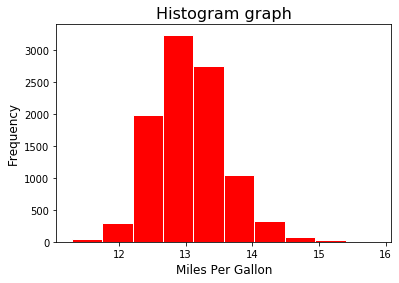

In [80]:
house.hist(column='price',
         grid=False,
         figsize = (6,4),
         color = 'red',
         edgecolor= 'white',
         bins=10)

plt.xlabel('Miles Per Gallon', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.title('Histogram graph', fontsize = 16)
plt.show()


In [79]:
house['price'] = np.log(house['price'])

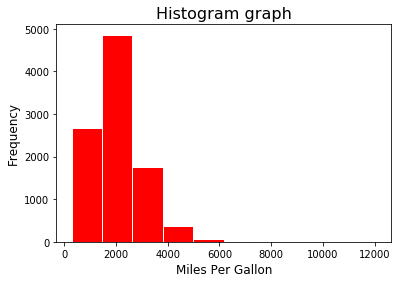

In [81]:
house.hist(column='sqft_living',
         grid=False,
         figsize = (6,4),
         color = 'red',
         edgecolor= 'white',
         bins=10)

plt.xlabel('Miles Per Gallon', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.title('Histogram graph', fontsize = 16)
plt.show()


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.DataFrame(data = np.random.random(size=(4,4)), columns = ['A','B','C','D'])

In [3]:
df

,A,B,C,D
0,0.279424,0.269186,0.365472,0.479623
1,0.119337,0.755422,0.481597,0.198334
2,0.842413,0.546083,0.054259,0.648715
3,0.688321,0.737164,0.943133,0.405312


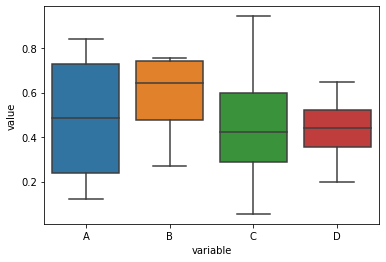

In [5]:
sns.boxplot(x="variable", y="value", data=pd.melt(df))

plt.show()